In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('irisn.csv',delimiter=',')
data_x=data.iloc[:,:-1].values
data_x.shape

(150, 4)

In [13]:
def cluster_mean(max_iters,data_x,K,data):
    centroids = data_x[np.random.choice(data_x.shape[0], size=K, replace=False), :]
    #centroids=data.iloc[0:K,:-1].values
    max_iters=300;
    centroids_the_same=False
    iters=0
    cluster_assignments=np.zeros(data_x.shape[0])
    while iters<max_iters and not(centroids_the_same):
        output=0.0
    # Go through each data point and assign it to the nearest centroid
        for i in range(0, data_x.shape[0]):
            min_distance = float("inf")
 
            for j in range(0, K):
         
            # Calculate the Euclidean distance from this instance to the
            # centroid
                distance = np.linalg.norm(data_x[i] - centroids[j])
        #print(distance," ", min_distance)
            # If we have a centroid that is closer to this instance,
            # update the cluster assignment for this instance.
                if distance < min_distance:
                    cluster_assignments[i] =j
                    min_distance = distance # Update the minimum distance
            output=output+min_distance**2
        old_centroids=centroids.copy() 
        for row_c in range(0,K):
            for col in range(0,data_x.shape[1]):
                sum1=0
                count=0
                for row in range(0,data_x.shape[0]):
                #print(cluster_assignments[row]," ",row_c)
                    if (cluster_assignments[row]==row_c):
                        sum1=sum1+data_x[row][col]
                        count=count+1
                if count>0:        
                    centroids[row_c][col]=(sum1/count)        
        count1=0
        for i in range(0,K):
            for j in range(0,data_x.shape[1]):
                #print(old_centroids[i][j],"  ",centroids[i][j])
                if old_centroids[i][j]==centroids[i][j]:
                    count1=count1+1            
        if count1==K*data_x.shape[1]:
            centroids_the_same=True
        iters=iters+1
        
    return output  

[680.8244     152.36870648  78.94506583  71.34399912  50.06165816
  45.47813517  38.5386946   41.67766275  28.78692294  33.28976432]


Text(0, 0.5, 'ouput')

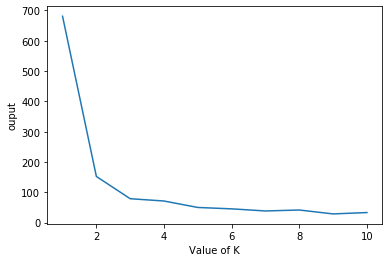

In [15]:
output=np.ones(10)
for i in range(1,11):
    output[i-1]=cluster_mean(300,data_x,i,data)
print(output)
import matplotlib.pyplot as plt
ouput=list(output)
n_itr=[x for x in range(1,11)]
plt.plot(n_itr,output)
plt.xlabel('Value of K')
plt.ylabel('ouput')